In [736]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score, precision_score, recall_score
from scikitplot.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from category_encoders import TargetEncoder

In [708]:
df = pd.read_csv("train.csv", sep = ",", index_col = 0) ####usare la regr. logistica

In [709]:
response = df["Response"].value_counts()
print(f"Interessati = {response[1]} ({response[1]/response.sum()*100:.2f}%) ")
print(f"Non interessati = {response[0]} ({response[0]/response.sum()*100:.2f}%) ")

Interessati = 46710 (12.26%) 
Non interessati = 334399 (87.74%) 


<AxesSubplot:xlabel='Response', ylabel='count'>

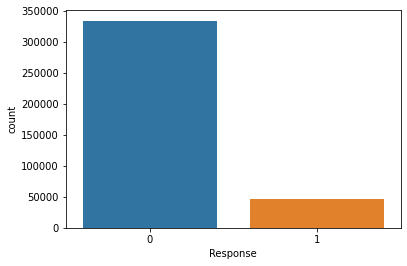

In [710]:
sns.countplot(data=df, x = "Response") 

C:\Users\Utente\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Driving_License', ylabel='count'>

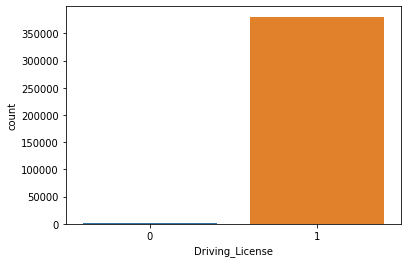

In [711]:
sns.countplot(df['Driving_License'],data=df)

C:\Users\Utente\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

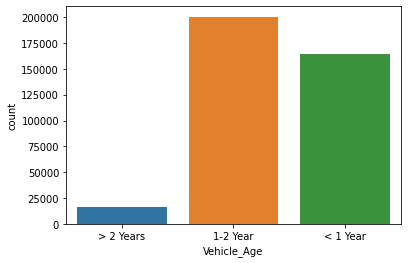

In [712]:
sns.countplot(df["Vehicle_Age"],data=df)

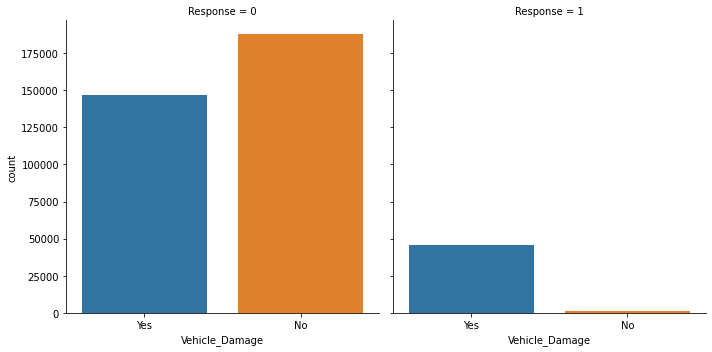

In [713]:
sns.catplot(x="Vehicle_Damage", col="Response", data=df, kind="count")

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

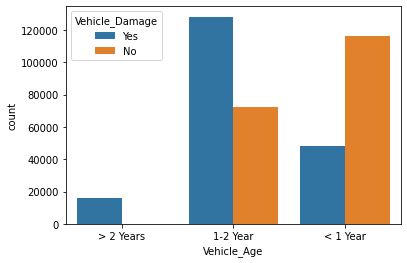

In [714]:
sns.countplot(data=df, x='Vehicle_Age', hue='Vehicle_Damage')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

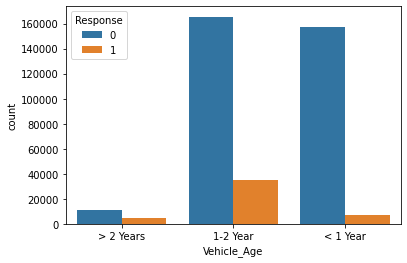

In [613]:
sns.countplot(data=df, x='Vehicle_Age', hue='Response')

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

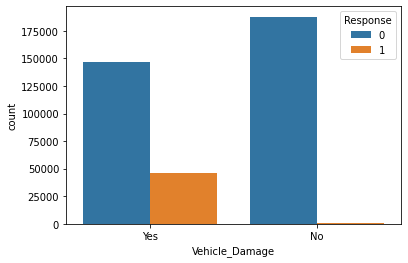

In [612]:
sns.countplot(data=df, x='Vehicle_Damage', hue='Response')

sbilanciamento pesante

In [113]:
df.head() 

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


alcune variabili sono difficili da gestire per sklearn, quindi bisogna decodificarle

In [715]:
variables_std = ['Age', 'Annual_Premium', 'Vintage']
ss= StandardScaler()
ss.fit(df[variables_std])

df[variables_std] = ss.transform(df[variables_std])

elimino parte delle features con cui la variabile target ha correlazione bassa o nulla

In [716]:
df = pd.get_dummies(df, columns=["Gender", "Previously_Insured", "Driving_License", "Vehicle_Damage"], drop_first=True)
df = pd.get_dummies(df, columns = ["Vehicle_Age"])

In [717]:
df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Previously_Insured_1,Driving_License_1,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
id,,,,,,,,,,,,,
1,0.333777,28.0,0.574539,26.0,0.748795,1,1,0,1,1,0,0,1
2,2.396751,3.0,0.172636,26.0,0.342443,0,1,0,1,0,1,0,0
3,0.527181,28.0,0.449053,26.0,-1.521998,1,1,0,1,1,0,0,1
4,-1.148985,11.0,-0.113018,152.0,0.581474,0,1,1,1,0,0,1,0
5,-0.633242,41.0,-0.178259,152.0,-1.378580,0,0,1,1,0,0,1,0


In [718]:
random_seed = 0

In [719]:
df["Region_Code"] = df["Region_Code"].map(str)
df["Policy_Sales_Channel"] = df["Policy_Sales_Channel"].map(str)

In [720]:
encoder = TargetEncoder()

df["Region_Code_enc"] = encoder.fit_transform(df['Region_Code'], df['Response'])
df["Region_Code_enc"] = encoder.transform(df['Region_Code'])
df["Policy_Sales_enc"] = encoder.fit_transform(df['Policy_Sales_Channel'], df['Response'])
df["Policy_Sales_enc"] = encoder.transform(df['Policy_Sales_Channel'])

C:\Users\Utente\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Utente\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


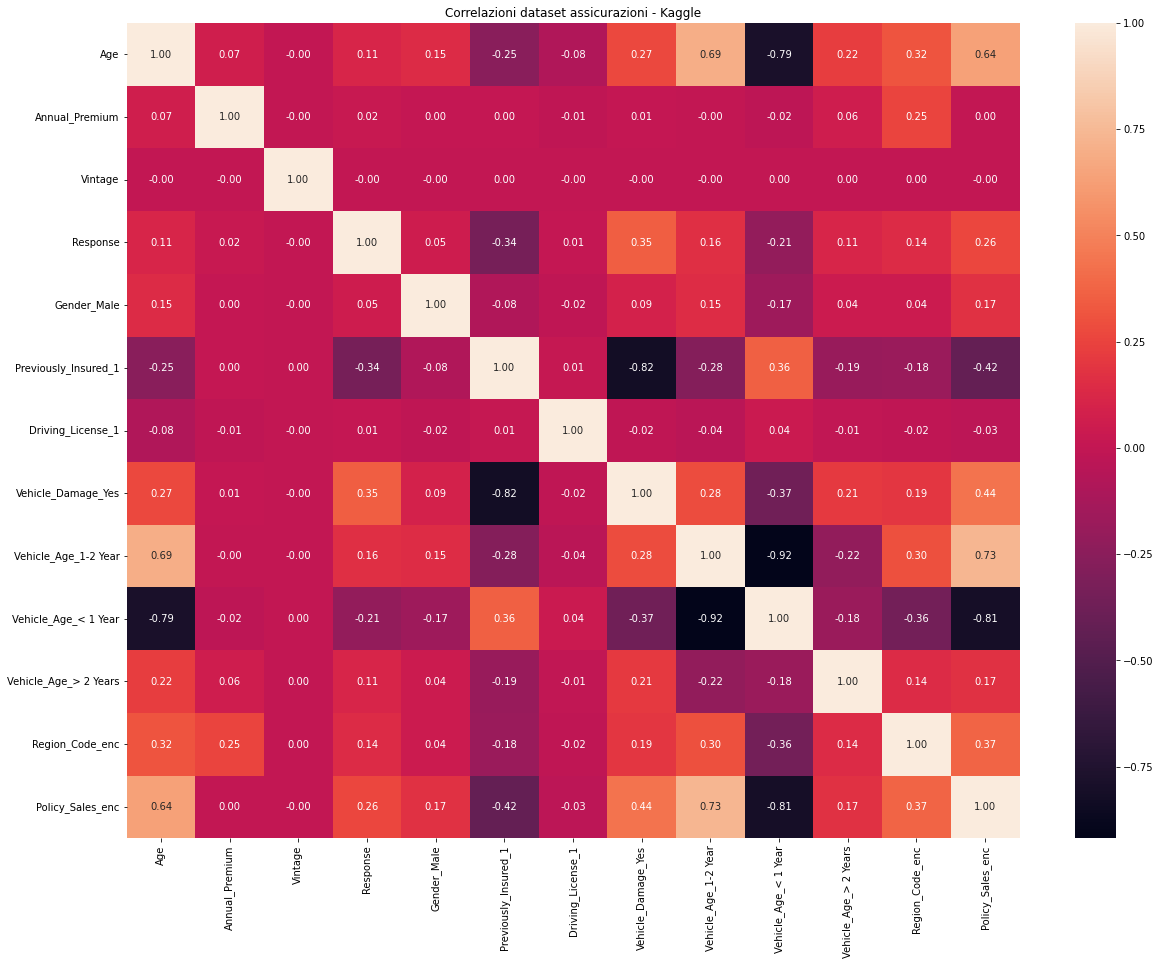

In [721]:
plt.figure(figsize = (20,15))
sns.heatmap( df.corr(), annot=True, fmt='.2f')
plt.title("Correlazioni dataset assicurazioni - Kaggle")
plt.show()

dalla matrice di correlazione possiamo notare che le quattro variabili più correlate sono l'età, l'età del veicolo, i danni subiti, se era stato già assicurato con la compagnia e il canale con cui è avvenuta la proposta
si nota anche che le variabili sono anche abbastanza correlate tra loro
mentre la variabile "possesso della patente" probabilmente non è correlata forse perché è scontato che per stipulare una polizza assicurativa, il cliente sia in possesso della patente di guida

In [722]:
variables_to_drop = ["Region_Code", "Policy_Sales_Channel","Vintage", "Driving_License_1", "Annual_Premium", "Gender_Male"]

In [723]:
df = df.drop(variables_to_drop, axis = 1)

In [724]:
df.head()

,Age,Response,Previously_Insured_1,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_Code_enc,Policy_Sales_enc
id,,,,,,,,,
1,0.333777,1,0,1,0,0,1,0.187163,0.199385
2,2.396751,0,0,0,1,0,0,0.127662,0.199385
3,0.527181,1,0,1,0,0,1,0.187163,0.199385
4,-1.148985,0,1,0,0,1,0,0.112760,0.028624
5,-0.633242,0,1,0,0,1,0,0.121776,0.028624


In [773]:
df_try = df.copy()

In [774]:
X = df_try.drop("Response", axis = 1)
y = df_try.Response

In [775]:
random_sampler = RandomOverSampler(sampling_strategy = "minority", random_state=random_seed)
X_r, y_r = random_sampler.fit_resample(X, y)

In [776]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size = 0.3, random_state=random_seed)

In [811]:
class_weight = {0:0.63, 1:0.37}##pesi scelti dopo diverse prove

In [813]:
log_regr = LogisticRegression(max_iter = 600, class_weight = class_weight, random_state = random_seed).fit(X_train, y_train)

C:\Users\Utente\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


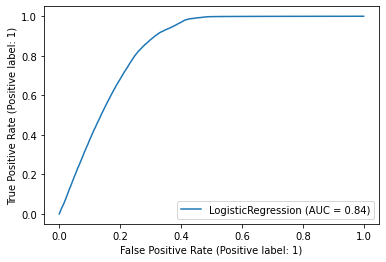

In [814]:
plot_roc_curve(log_regr, X_test, y_test)

In [815]:
y_pred_train = log_regr.predict(X_train)
y_proba_train = log_regr.predict_proba(X_train)

y_pred_test = log_regr.predict(X_test)
y_proba_test =  log_regr.predict_proba(X_test)

y_pred_train = np.where(y_proba_train[:,1] > 0.4, 1, 0) ###0.4 valore ricavato dalla curva di roc
y_pred_test = np.where(y_proba_test[:,1] > 0.4, 1, 0)

target_names = ["Not Interested", "Interested"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

                precision    recall  f1-score   support

Not Interested       0.87      0.69      0.77    100328
    Interested       0.74      0.90      0.81    100312

      accuracy                           0.79    200640
     macro avg       0.81      0.79      0.79    200640
  weighted avg       0.81      0.79      0.79    200640



In [816]:
a_score = accuracy_score(y_test, y_pred_test)
p_score = precision_score(y_test, y_pred_test)
r_score = recall_score(y_test, y_pred_test)
#a_score, p_score, r_score
print(f"Il punteggio di Accuracy è: {a_score}.\nIl punteggio di Precision è: {p_score}.\nIl punteggio di Recall è: {r_score}.")

Il punteggio di Accuracy è: 0.792573763955343.
Il punteggio di Precision è: 0.7407544135984774.
Il punteggio di Recall è: 0.9001415583379855.


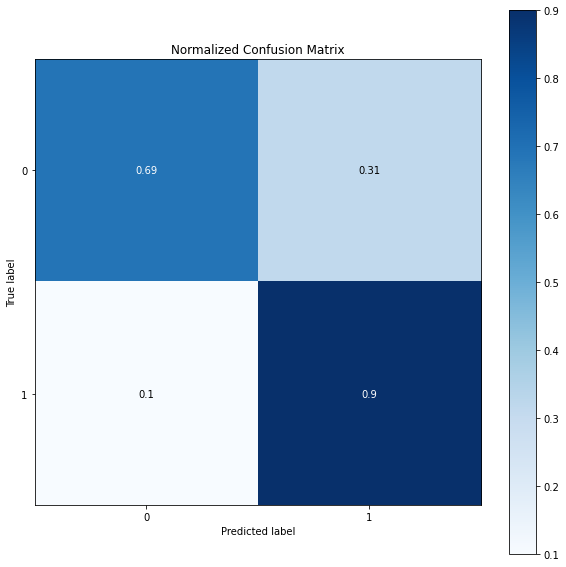

In [817]:
plot_confusion_matrix ( y_test, y_pred_test , normalize = True, figsize = (10,10))
plt.show()